In [15]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

%matplotlib inline

In [2]:
dataset = pd.read_csv('./eye_ratio_r_f.csv')
print(dataset.shape)

(200, 21)


In [3]:
dataset

,L T,R T,L T-1,R T-1,L T-2,R T-2,L T-3,R T-3,L T-4,R T-4,...,R T-5,L T-6,R T-6,L T-7,R T-7,L T-8,R T-8,L T-9,R T-9,class
0,0.910642,0.392232,0.894427,0.419918,1.000000,0.418681,0.857400,0.392232,0.857400,0.392232,...,0.372104,0.894427,0.421998,0.936200,0.392232,1.000000,0.386063,0.920869,0.367467,real
1,0.894427,0.419918,1.000000,0.418681,0.857400,0.392232,0.857400,0.392232,0.894427,0.372104,...,0.421998,0.936200,0.392232,1.000000,0.386063,0.920869,0.367467,0.925292,0.367467,real
2,1.000000,0.418681,0.857400,0.392232,0.857400,0.392232,0.894427,0.372104,0.894427,0.421998,...,0.392232,1.000000,0.386063,0.920869,0.367467,0.925292,0.367467,0.941534,0.414981,real
3,0.857400,0.392232,0.857400,0.392232,0.894427,0.372104,0.894427,0.421998,0.936200,0.392232,...,0.386063,0.920869,0.367467,0.925292,0.367467,0.941534,0.414981,0.956996,0.462819,real
4,0.857400,0.392232,0.894427,0.372104,0.894427,0.421998,0.936200,0.392232,1.000000,0.386063,...,0.367467,0.925292,0.367467,0.941534,0.414981,0.956996,0.462819,0.956996,0.462819,real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.895533,0.556239,0.946594,0.548559,0.946594,0.548559,0.904989,0.552117,0.895045,0.582623,...,0.576764,0.946594,0.548559,0.895533,0.548559,0.904989,0.548559,0.895533,0.612579,fake
196,0.946594,0.548559,0.946594,0.548559,0.904989,0.552117,0.895045,0.582623,0.951315,0.576764,...,0.548559,0.895533,0.548559,0.904989,0.548559,0.895533,0.612579,0.895045,0.576764,fake
197,0.946594,0.548559,0.904989,0.552117,0.895045,0.582623,0.951315,0.576764,0.946594,0.548559,...,0.548559,0.904989,0.548559,0.895533,0.612579,0.895045,0.576764,0.861441,0.582623,fake
198,0.904989,0.552117,0.895045,0.582623,0.951315,0.576764,0.946594,0.548559,0.895533,0.548559,...,0.548559,0.895533,0.612579,0.895045,0.576764,0.861441,0.582623,0.946059,0.548559,fake


In [4]:
features = list(dataset.columns)[:-1]
features

['L T',
 'R T',
 'L T-1',
 'R T-1',
 'L T-2',
 'R T-2',
 'L T-3',
 'R T-3',
 'L T-4',
 'R T-4',
 'L T-5',
 'R T-5',
 'L T-6',
 'R T-6',
 'L T-7',
 'R T-7',
 'L T-8',
 'R T-8',
 'L T-9',
 'R T-9']

In [5]:
dataset[features].shape

(200, 20)

In [6]:
dataset[['class']].shape

(200, 1)

In [7]:
X_train, X_val_test, y_train, y_val_test = train_test_split(dataset[features], dataset[['class']], random_state=0, train_size=0.7, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, random_state=0, train_size=0.5, shuffle=True)

In [8]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (140, 20)
y_train shape: (140, 1)
X_val shape: (30, 20)
y_val shape: (30, 1)
X_test shape: (30, 20)
y_test shape: (30, 1)


In [9]:
n_neighbors_params = [1,2,3,5,8, 9, 10, 11, 12, 14, 15]
trails = []

for n_neighbors in n_neighbors_params:
    
    # Initializing KNN
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Fit to training data
    knn.fit(X_train, y_train)

    # Training set prediction
    train_set_score = round(knn.score(X_train, y_train), 3)

    # Validation set prediction
    val_set_score = round(knn.score(X_val, y_val), 3)
    
    trails.append( {'No. of neighbors': n_neighbors,
                    'Train set score' : train_set_score,
                    'Validation set score':val_set_score} )
    
df = pd.DataFrame(trails)
df

C:\Users\mirta\Anaconda3\envs\Py_T\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mirta\Anaconda3\envs\Py_T\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mirta\Anaconda3\envs\Py_T\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mirta\Anaconda3\envs\Py_T\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed wh

,No. of neighbors,Train set score,Validation set score
0,1,1.000,0.967
1,2,0.979,0.967
2,3,0.986,0.967
3,5,0.979,0.967
4,8,0.957,0.900
5,9,0.957,0.900
6,10,0.957,0.900
7,11,0.957,0.900
8,12,0.950,0.900
9,14,0.943,0.900


In [10]:
n_neighbors = 3
# Initializing KNN
knn = KNeighborsClassifier(n_neighbors = n_neighbors)

# Fit to training data
knn.fit(X_train, y_train)
print("n_neighors: {}".format(n_neighbors))

# Test set prediction
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

n_neighors: 3
Test set score: 0.933


C:\Users\mirta\Anaconda3\envs\Py_T\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')],
 Text(33.0, 0.5, 'Actual label'),
 [Text(0.5, 0, 'Real'), Text(1.5, 0, 'Fake')],
 Text(0.5, 15.0, 'Predicted label')]

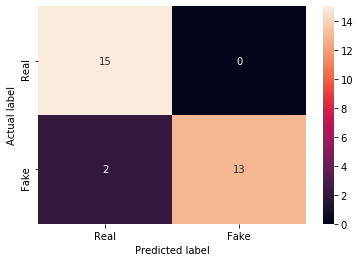

In [17]:
y_test_pred = knn.predict(X_test)
# print(y_test_pred, y_test)

# Confusion Matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, labels = None, sample_weight = None, normalize = None)

# Confusion Matrix heatmap (0 : glaucoma, 1 : normal)
heatmap_test = sn.heatmap(confusion_matrix_test, annot=True)
heatmap_test.set(xlabel='Predicted label', ylabel='Actual label', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])

In [18]:
import pickle 

# knn = NearestNeighbors(10)
# knn.fit(my_data)

# Its important to use binary mode 
eye_ratio_model = open('eye_ratio_model', 'wb') 

# source, destination 
pickle.dump(knn, eye_ratio_model)                      

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
C_params = [1,2,3,5,10,15,20,30]
max_iter_params = [100,100,1000,1000,10000,10000,10000,10000]
trails = []

for C,max_iter in zip(C_params, max_iter_params):
    
    # Initializing Logistic Regression
    logreg = LogisticRegression(C = C , max_iter = max_iter)

    # Fit to training data
    logreg.fit(X_train, y_train)

    # Training set prediction
    train_set_score = round(logreg.score(X_train, y_train), 3)

    # Validation set prediction
    val_set_score = round(logreg.score(X_val, y_val), 3)
    
    trails.append( {'C' : C,
                    'max_iter' : max_iter,
                    'Train set score' : train_set_score,
                    'Validation set score':val_set_score} )
    
df = pd.DataFrame(trails)
df

C:\Users\mirta\Anaconda3\envs\Py_T\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\mirta\Anaconda3\envs\Py_T\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\mirta\Anaconda3\envs\Py_T\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\mirta\Anaconda3\envs\Py_T\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

,C,max_iter,Train set score,Validation set score
0,1,100,0.879,0.867
1,2,100,0.921,0.867
2,3,1000,0.929,0.900
3,5,1000,0.950,0.933
4,10,10000,0.971,0.933
5,15,10000,0.979,0.933
6,20,10000,0.986,0.933
7,30,10000,0.993,0.933


In [20]:
C = 4
max_iter = 10000

# Initializing Logistic Regression
logreg = LogisticRegression(C = C , max_iter = max_iter)

# Fit to training data
logreg.fit(X_train, y_train)

# Test set prediction
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Test set score: 0.900


C:\Users\mirta\Anaconda3\envs\Py_T\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[Text(0, 0.5, 'Glaucoma'), Text(0, 1.5, 'Normal')],
 Text(33.0, 0.5, 'Actual label'),
 [Text(0.5, 0, 'Glaucoma'), Text(1.5, 0, 'Normal')],
 Text(0.5, 15.0, 'Predicted label')]

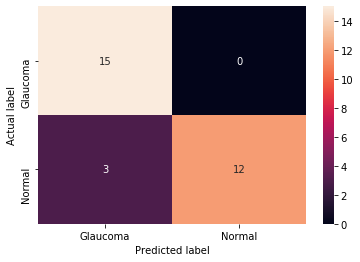

In [21]:
y_test_pred = logreg.predict(X_test)

# Confusion Matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, labels = None, sample_weight = None, normalize = None)

# Confusion Matrix heatmap (0 : glaucoma, 1 : normal)
heatmap_test = sn.heatmap(confusion_matrix_test, annot=True)
heatmap_test.set(xlabel='Predicted label', ylabel='Actual label', xticklabels=['Glaucoma', 'Normal'], yticklabels=['Glaucoma', 'Normal'])

In [22]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

max_depth_param = [1,2,3,5,10,15,20,30]
trails = []

for max_depth in max_depth_param:
    
    # Initializing Logistic Regression
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)

    # Fit to training data
    tree.fit(X_train, y_train)

    # Training set prediction
    train_set_score = round(tree.score(X_train, y_train), 3)

    # Validation set prediction
    val_set_score = round(tree.score(X_val, y_val), 3)
    
    trails.append( {'max_depth' : max_depth,
                    'Train set score' : train_set_score,
                    'Validation set score':val_set_score} )
    
df = pd.DataFrame(trails)
df

,max_depth,Train set score,Validation set score
0,1,0.893,0.767
1,2,0.964,0.867
2,3,1.000,0.867
3,5,1.000,0.867
4,10,1.000,0.867
5,15,1.000,0.867
6,20,1.000,0.867
7,30,1.000,0.867


In [23]:
max_depth = 2
# Initializing Logistic Regression
tree = DecisionTreeClassifier(max_depth = max_depth)

# Fit to training data
tree.fit(X_train, y_train)

# Test set prediction
print('Max depth:', max_depth, " Test set score: {:.3f}".format(tree.score(X_test, y_test)))

Max depth: 2  Test set score: 0.867
